In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

import jax
import jax.numpy as jnp
import visualization
from data import standardize
from utils import results, experiments, settings, equioutput, evaluation, graphs
from numpyro import distributions
import os
import global_settings
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
mean = jnp.array([1.0, 2.0])
cov = jnp.array([
        [0.2, 0.1],
        [0.1, 0.1]
    ])
print(mean.shape, cov.shape)
d = distributions.MultivariateNormal(
    mean,
    cov
)
#d = distributions.MultivariateNormal(jnp.zeros(2), jnp.eye(2))

(2,) (2, 2)


In [26]:
print(jnp.zeros(2).shape, jnp.eye(2).shape)

(2,) (2, 2)


In [27]:
key = jax.random.PRNGKey(0)

samples = d.sample(key, (1024,))
samples_tanh_1 = samples @ jnp.array([[-1.0, 0.0], [0.0, 1.0]])
samples_tanh_2 = samples @ jnp.array([[1.0, 0.0], [0.0, -1.0]])
samples_tanh_3 = samples @ jnp.array([[-1.0, 0.0], [0.0, -1.0]])

samples_perm_1 = samples @ jnp.array([[0.0, 1.0], [1.0, 0.0]])
all_samples = jnp.concatenate([samples, samples_tanh_1, samples_tanh_2, samples_tanh_3])
samples_perm = all_samples @ jnp.array([[0.0, 1.0], [1.0, 0.0]])
print(all_samples.shape)


print(samples[:4])

(4096, 2)
[[0.07656407 1.8322971 ]
 [1.1014496  2.2768307 ]
 [0.8657488  1.6442064 ]
 [0.9118297  1.9396276 ]]


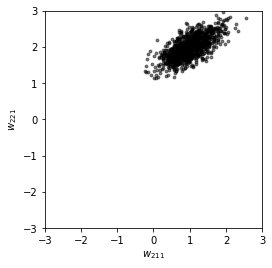

In [28]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.set_xlim([-3.0, 3.0])
ax.set_ylim([-3.0, 3.0])
ax.set_aspect("equal")
ax.set_xlabel(r"$w_{211}$")
ax.set_ylabel(r"$w_{221}$")

ax.scatter(samples[:, 0], samples[:, 1], s=8, alpha=0.5, c="black")

In [29]:
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "toy_posterior_01.png"), bbox_inches="tight", dpi=300)

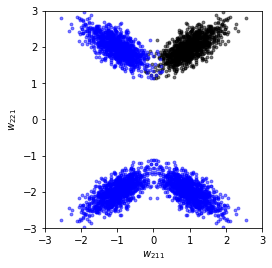

In [30]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.set_xlim([-3.0, 3.0])
ax.set_ylim([-3.0, 3.0])
ax.set_aspect("equal")
ax.set_xlabel(r"$w_{211}$")
ax.set_ylabel(r"$w_{221}$")

ax.scatter(samples[:, 0], samples[:, 1], s=8, alpha=0.5, c="black")
ax.scatter(samples_tanh_1[:, 0], samples_tanh_1[:, 1], s=8, alpha=0.5, c="blue")
ax.scatter(samples_tanh_2[:, 0], samples_tanh_2[:, 1], s=8, alpha=0.5, c="blue")
ax.scatter(samples_tanh_3[:, 0], samples_tanh_3[:, 1], s=8, alpha=0.5, c="blue")
#ax.scatter(samples_perm[:, 0], samples_perm[:, 1], s=8, alpha=0.5, c="blue")

In [31]:
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "toy_posterior_02.png"), bbox_inches="tight", dpi=300)

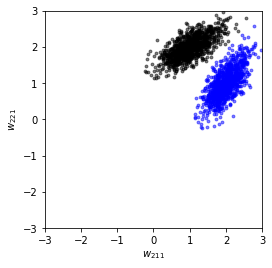

In [32]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.set_xlim([-3.0, 3.0])
ax.set_ylim([-3.0, 3.0])
ax.set_aspect("equal")
ax.set_xlabel(r"$w_{211}$")
ax.set_ylabel(r"$w_{221}$")

ax.scatter(samples[:, 0], samples[:, 1], s=8, alpha=0.5, c="black")
ax.scatter(samples_perm_1[:, 0], samples_perm_1[:, 1], s=8, alpha=0.5, c="blue")

In [33]:
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "toy_posterior_03.png"), bbox_inches="tight", dpi=300)

<AxesSubplot:ylabel='Density'>

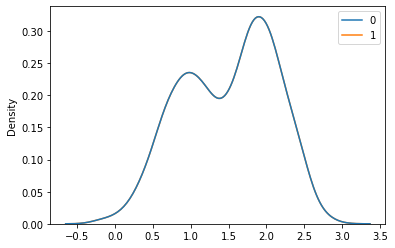

In [34]:
sns.kdeplot(data=jnp.concatenate([samples, samples_perm_1]))

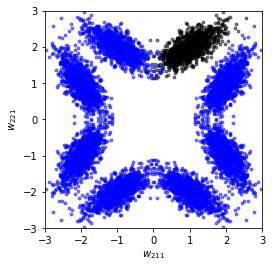

In [35]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.set_xlim([-3.0, 3.0])
ax.set_ylim([-3.0, 3.0])
ax.set_aspect("equal")
ax.set_xlabel(r"$w_{211}$")
ax.set_ylabel(r"$w_{221}$")

ax.scatter(samples[:, 0], samples[:, 1], s=8, alpha=0.5, c="black")
ax.scatter(samples_tanh_1[:, 0], samples_tanh_1[:, 1], s=8, alpha=0.5, c="blue")
ax.scatter(samples_tanh_2[:, 0], samples_tanh_2[:, 1], s=8, alpha=0.5, c="blue")
ax.scatter(samples_tanh_3[:, 0], samples_tanh_3[:, 1], s=8, alpha=0.5, c="blue")
ax.scatter(samples_perm[:, 0], samples_perm[:, 1], s=8, alpha=0.5, c="blue")

In [36]:
figure.savefig(os.path.join(global_settings.PATH_FIGURES, "toy_posterior_04.png"), bbox_inches="tight", dpi=300)

# 3d

In [24]:
import ipyvolume as ipv

In [29]:
mean = jnp.array([2.0, 1.0, 2.0])
cov = jnp.eye(3) * 0.01
print(mean.shape, cov.shape)
d = distributions.MultivariateNormal(
    mean,
    cov
)

key = jax.random.PRNGKey(0)
samples = d.sample(key, (1024,))

samples_all = jnp.stack([
    samples[:, [0, 1, 2]],
    samples[:, [0, 2, 1]],
    samples[:, [1, 0, 2]],
    samples[:, [1, 2, 0]],
    samples[:, [2, 0, 1]],
    samples[:, [2, 1, 0]]
], -1)
print(samples_all.shape)

(3,) (3, 3)
(1024, 3, 6)


In [30]:
fig = ipv.figure(width=512, height=512)
for h in range(samples_all.shape[-1]):
    scatter = ipv.scatter(samples_all[:, 0, h], samples_all[:, 1, h], samples_all[:, 2, h], marker="point_2d", size=16, color="blue")

#ipv.pylab.style.axes_off()
#ipv.pylab.style.box_off()
ipv.show()

In [31]:
concatenated = samples_all.transpose(0, 2, 1).reshape((-1, 3))
print(concatenated.shape)

(6144, 3)


<AxesSubplot:ylabel='Density'>

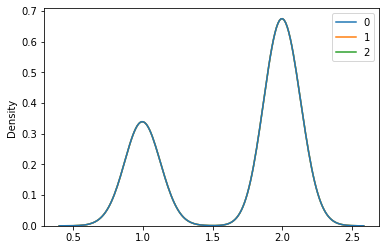

In [32]:
import seaborn as sns
sns.kdeplot(data=concatenated)